# Ask and Prepare

**1.	A clear statement of the business task**

"How do annual members and casual riders use Cyclistic bikes differently?"

**2.	A description of all data sources used**

**●  Where is your data located?**
The datasets used are from the Divvy Bike Share Program in Chicago and have been made available by Motivate International Inc. (https://divvy-tripdata.s3.amazonaws.com/index.html). For this case study purpose, the datasets are the 12 months of Cyclistic trip data, from November 2021 until October 2022.

**●  How is the data organized?**
There are 15 attributes including: ride ID number, ride type, start/end time, starting point (id, station name, and latitude/longitude), ending point (id, station, and latitude/longitude), and member/casual rider formatted in comma-delimited (.CSV) file.

**●  Are there issues with bias or credibility in this data?** 
It it assumed that the data is reliable because this is a case study using open public data.

**●  Are there any problems with the data?** 
There are several null values and entries with ended time value is before the started time value.


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import pandas as pd

In [ ]:
import zipfile

zip_ref = zipfile.ZipFile("/content/gdrive/MyDrive/Data Analytics/Bike-Share Case/Raw/2111-to-2210-tripdata.zip", 'r')
zip_ref.extractall("/tmp")
zip_ref.close()

# Process (Combine and Cleaning the Data)

In [ ]:
df = pd.concat(map(
    pd.read_csv, ["/tmp/202111-divvy-tripdata.csv",
                "/tmp/202112-divvy-tripdata.csv",
                "/tmp/202201-divvy-tripdata.csv",
                "/tmp/202202-divvy-tripdata.csv",
                "/tmp/202203-divvy-tripdata.csv",
                "/tmp/202204-divvy-tripdata.csv",
                "/tmp/202205-divvy-tripdata.csv",
                "/tmp/202206-divvy-tripdata.csv",
                "/tmp/202207-divvy-tripdata.csv",
                "/tmp/202208-divvy-tripdata.csv",
                "/tmp/202209-divvy-tripdata.csv",
                "/tmp/202210-divvy-tripdata.csv"]),
               ignore_index=True)

In [ ]:
df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,7C00A93E10556E47,electric_bike,2021-11-27 13:27:38,2021-11-27 13:46:38,NaN,NaN,NaN,NaN,41.93,-87.72,41.96,-87.73,casual
1,90854840DFD508BA,electric_bike,2021-11-27 13:38:25,2021-11-27 13:56:10,NaN,NaN,NaN,NaN,41.96,-87.70,41.92,-87.70,casual
2,0A7D10CDD144061C,electric_bike,2021-11-26 22:03:34,2021-11-26 22:05:56,NaN,NaN,NaN,NaN,41.96,-87.70,41.96,-87.70,casual
3,2F3BE33085BCFF02,electric_bike,2021-11-27 09:56:49,2021-11-27 10:01:50,NaN,NaN,NaN,NaN,41.94,-87.79,41.93,-87.79,casual
4,D67B4781A19928D4,electric_bike,2021-11-26 19:09:28,2021-11-26 19:30:41,NaN,NaN,NaN,NaN,41.90,-87.63,41.88,-87.62,casual


In [ ]:
df['started_at'] = pd.to_datetime(df['started_at'], format='%Y-%m-%d %H:%M:%S')
df['ended_at'] = pd.to_datetime(df['ended_at'], format='%Y-%m-%d %H:%M:%S')

In [ ]:
df['ride_length'] = df['ended_at'] - df['started_at']
df['ride_length'].astype('timedelta64[s]')

In [ ]:
df['day_of_week'] = df['started_at'].dt.dayofweek

In [ ]:
df = df.dropna()

In [ ]:
df = df.drop(df[df.ride_length < pd.to_timedelta(0)].index)

In [ ]:
df.describe()

,start_lat,start_lng,end_lat,end_lng,ride_length,day_of_week
count,4.410364e+06,4.410364e+06,4.410364e+06,4.410364e+06,4410364,4.410364e+06
mean,4.190216e+01,-8.764476e+01,4.190246e+01,-8.764502e+01,0 days 00:17:14.554835609,3.056366e+00
std,4.235378e-02,2.561092e-02,4.249600e-02,2.494817e-02,0 days 00:57:15.486511255,1.987398e+00
min,4.164850e+01,-8.783332e+01,4.164850e+01,-8.783000e+01,0 days 00:00:00,0.000000e+00
25%,4.188118e+01,-8.765814e+01,4.188132e+01,-8.765840e+01,0 days 00:06:05,1.000000e+00
50%,4.189694e+01,-8.764171e+01,4.189766e+01,-8.764275e+01,0 days 00:10:40,3.000000e+00
75%,4.192875e+01,-8.762858e+01,4.192883e+01,-8.762858e+01,0 days 00:19:07,5.000000e+00
max,4.563503e+01,-7.379648e+01,4.206497e+01,-8.752823e+01,23 days 20:34:04,6.000000e+00


In [ ]:
df['day_of_week'].mode()

0    5
dtype: int64

**INSIGHTS PART 1 (OVERALL STATISTICS):**


1.   The **average of ride length is 17 minutes 14.555 seconds.**
2.   The **longest ride length is 23 days 20 hours 34 minutes 4 seconds.**
3. The bike-share service is **mostly used on Saturday** (Monday=0, Saturday=5, Sunday=6).



In [59]:
import numpy as np

In [60]:
table_1 = pd.pivot_table(df, values='ride_length', index=['member_casual'], aggfunc=np.mean)

In [61]:
table_1

,ride_length
member_casual,
casual,0 days 00:24:23.921822499
member,0 days 00:12:27.227533200


In [62]:
table_2 = pd.pivot_table(df, values='ride_length', index=['member_casual'], columns='day_of_week' , aggfunc=np.mean)

In [63]:
table_2

day_of_week,0,1,2,3,4,5,6
member_casual,,,,,,,
casual,0 days 00:25:16.667033797,0 days 00:21:51.127515711,0 days 00:21:12.060953539,0 days 00:21:53.183855965,0 days 00:22:40.743041817,0 days 00:26:57.388785076,0 days 00:27:38.344175850
member,0 days 00:12:00.807137193,0 days 00:11:46.899138372,0 days 00:11:50.183589790,0 days 00:12:00.932299312,0 days 00:12:12.649048562,0 days 00:14:01.785675654,0 days 00:13:52.250071778


In [71]:
table_3 = df.groupby(['day_of_week','member_casual'])['ride_id'].count()

In [72]:
table_3

day_of_week  member_casual
0            casual           214274
             member           385922
1            casual           194925
             member           413636
2            casual           202236
             member           415339
3            casual           225780
             member           413467
4            casual           249706
             member           365079
5            casual           375143
             member           345761
6            casual           306079
             member           303017
Name: ride_id, dtype: int64

**INSIGHTS PART 2 (MEMBER VS. CASUAL RIDERS):**

1.   The average ride length of **'Casual' riders (24 minutes 23.922 seconds)** is longer than **'Member' riders' (12 minutes 27.228 seconds)**, which is about 2 times.
2.   The previous point is reasonable given that members are probably using the bike-share service for commuting purposes (such as those to work or school), while casual riders are probably using for sightseeing around the city, which is usually longer in distance.
3. The riders from both group use the bike-share service **longer on weekends** than on weekdays.
4. **For 'Member' riders, the number of rides is greater on weekdays than on weekends.** It is alligned with their purpose of using the service for commuting.
5. **For 'Casual' riders, the number of rides** begins slowly on Tuesdays, **progressively rises to a peak on Saturdays,** and then slightly declines on Sundays and Mondays.






Additional code lines

In [73]:
df.shape[0] # Number of rows

4410364

In [75]:
df_2 = df.drop(columns=['start_lat', 'start_lng', 'end_lat', 'end_lng'])

In [76]:
df_2.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,member_casual,ride_length,day_of_week
45,4CA9676997DAFFF6,classic_bike,2021-11-26 10:27:28,2021-11-26 11:22:13,Michigan Ave & Oak St,13042,Michigan Ave & Oak St,13042,casual,0 days 00:54:45,4
127,F3E84A230AF2D676,classic_bike,2021-11-15 09:35:03,2021-11-15 09:42:08,Clark St & Grace St,TA1307000127,Clark St & Leland Ave,TA1309000014,casual,0 days 00:07:05,0
190,A1F2C92308007968,electric_bike,2021-11-10 16:27:02,2021-11-10 17:04:28,Leamington Ave & Hirsch St,307,Leamington Ave & Hirsch St,307,casual,0 days 00:37:26,2
211,9B871C3B14E9BEC4,classic_bike,2021-11-09 19:51:36,2021-11-09 20:11:17,Desplaines St & Kinzie St,TA1306000003,Desplaines St & Kinzie St,TA1306000003,casual,0 days 00:19:41,1
256,2A81E957DD24A3DC,classic_bike,2021-11-06 19:14:10,2021-11-06 19:33:19,Larrabee St & Armitage Ave,TA1309000006,Michigan Ave & Oak St,13042,casual,0 days 00:19:09,5


# Share the Findings

By using the combined dataset, I made several visualization using Tableau Public as follows.

**Figure 1:**

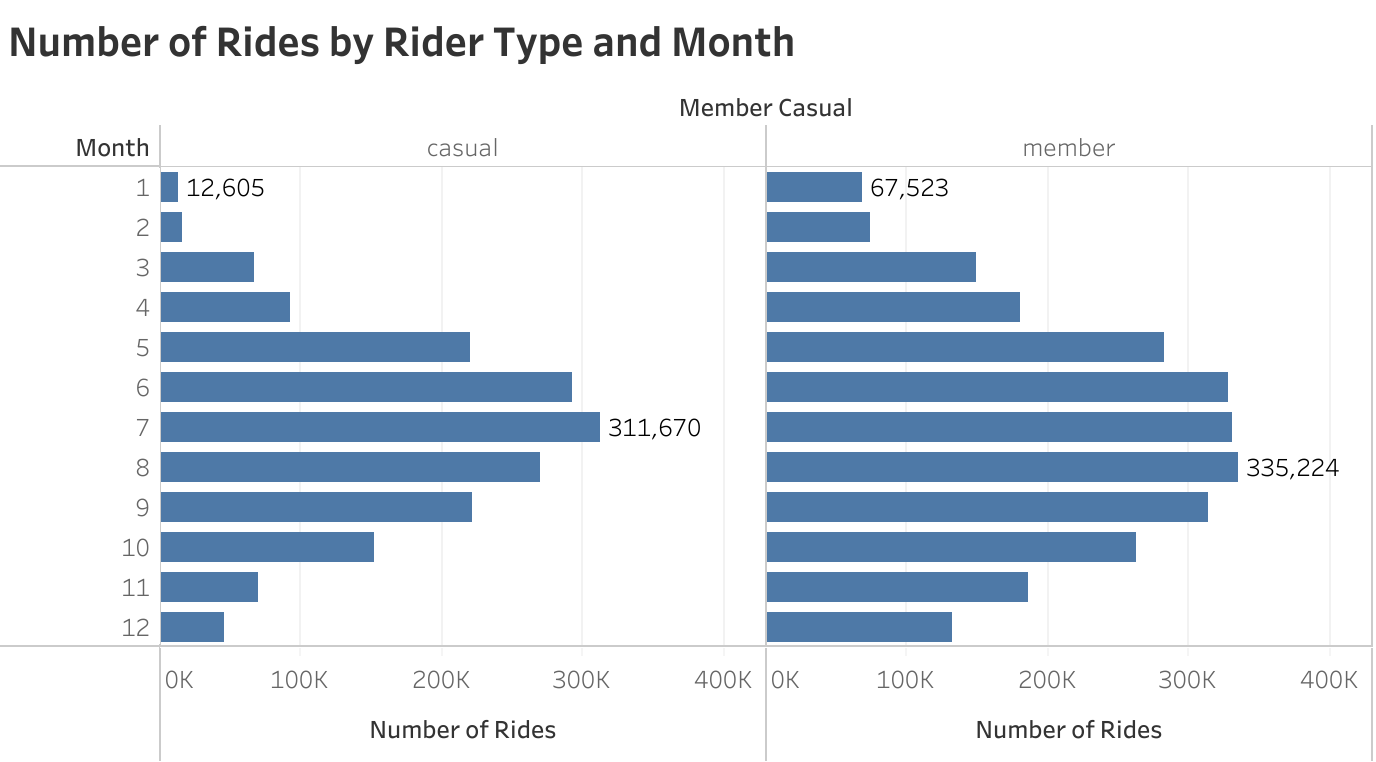

**Figure 2:**

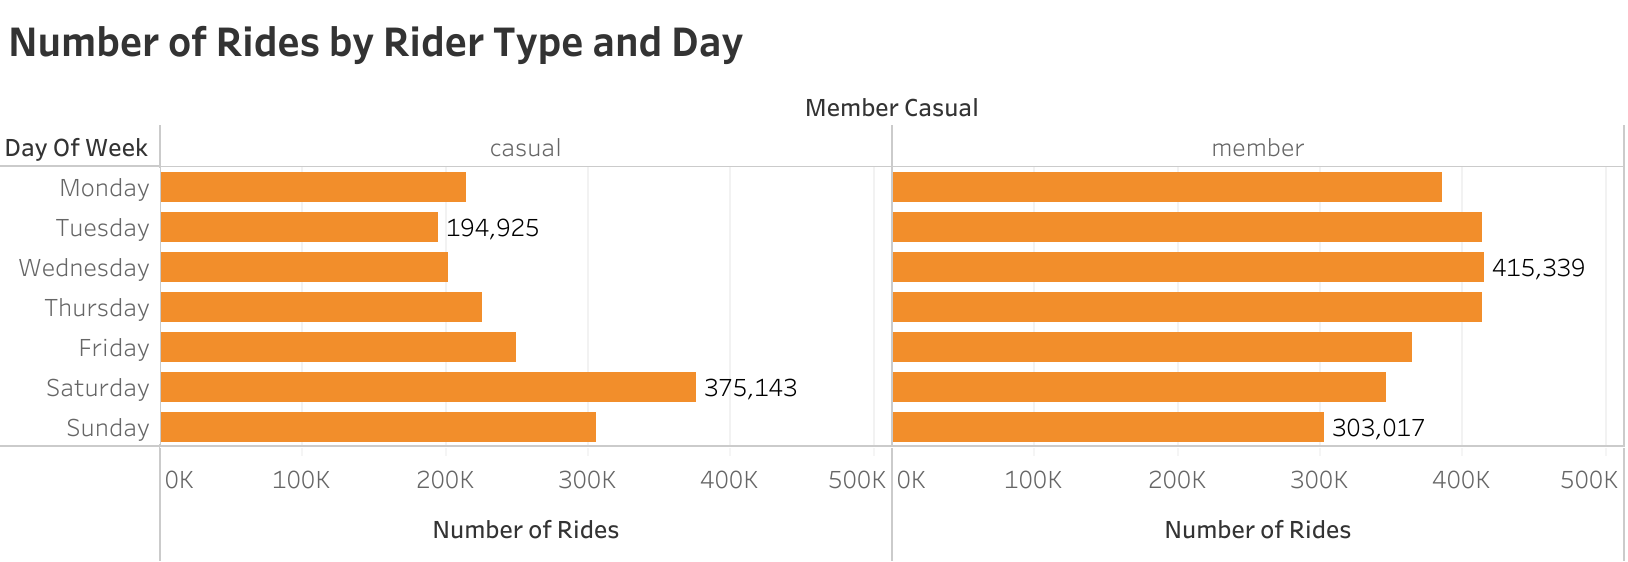

**Figure 3:**

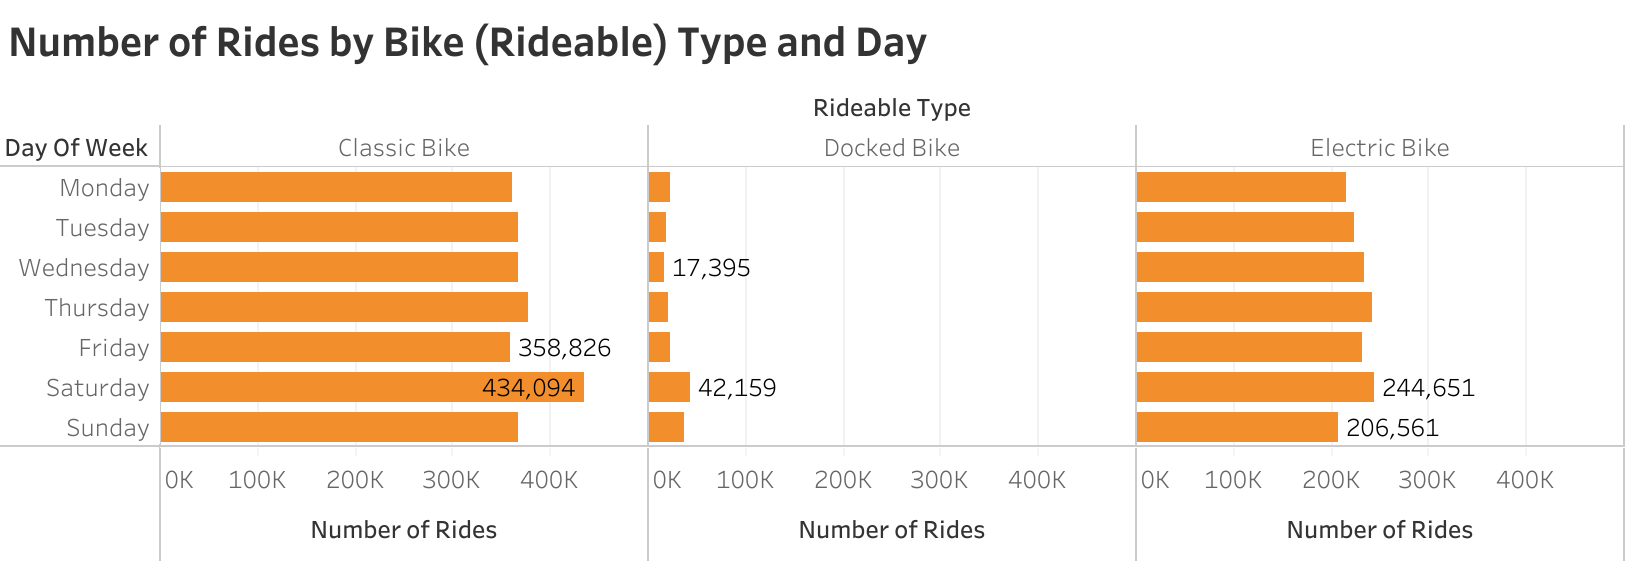

**Figure 4:**

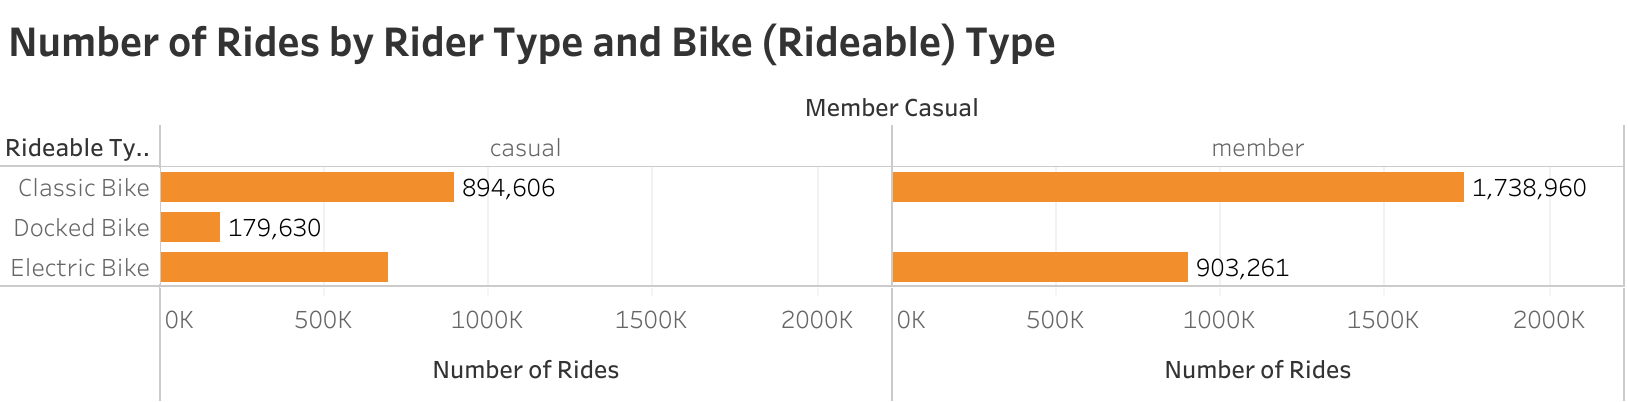

**Figure 5:**

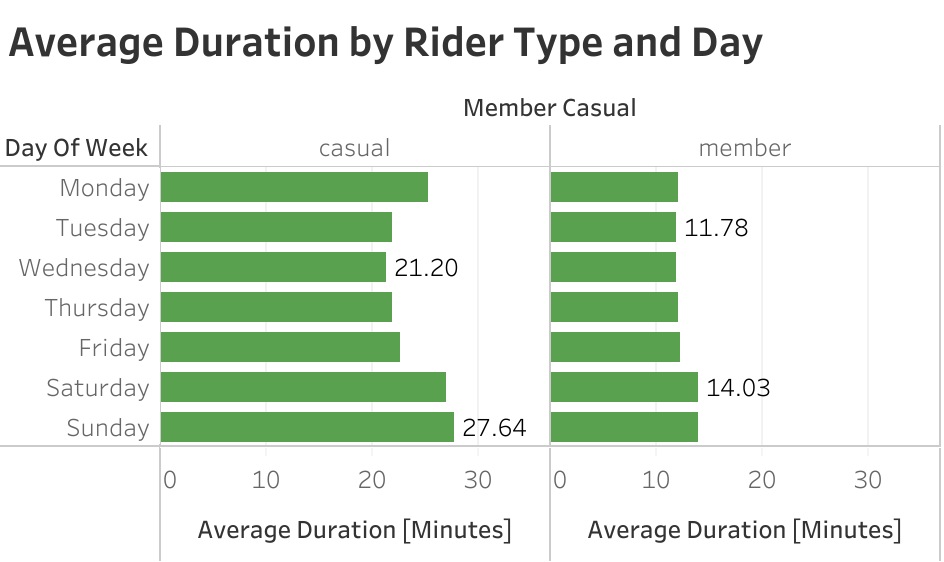

**Figure 6:**

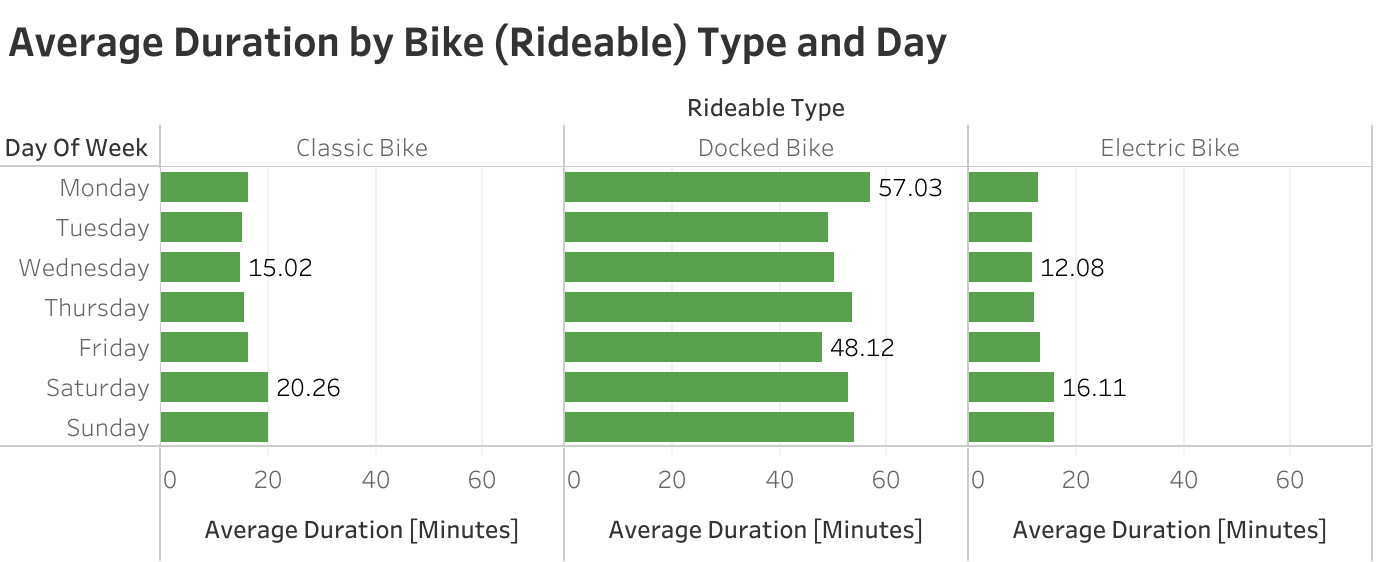

**KEY TAKEAWAYS:**


1.   Both types of riders of bike-share service follow a seasonal pattern (Figure 1). Springtime rents begin to go up after the winter months when the number of rents is at its lowest. Summertime (July & August) is when usage peaks before beginning to dip in the fall.
2.   For 'Member' riders, the number of rides is greater on weekdays than on weekends (Figure 2). It is alligned with their purpose of using the service for commuting.
3. For 'Casual' riders, the number of rides begins slowly on Tuesdays, progressively rises to a peak on Saturdays, and then slightly declines on Sundays and Mondays (Figure 2).
4. In term of the number of rides/rents (Figure 3, Figure 4) the classic bike option is significantly more popular than both classic bikes and electric bikes. Besides, in term of ride duration, the docked bike is the most popular amongst all (Figure 6).
5. Each trip lasts, on average, 17 minutes. Casual riders typically ride for 24 minutes. Members typically ride for 12 minutes.
6. Casual riders often ride 2 times longer than members on weekdays and approximately the same duration on weekends, compared to members (Table 2).




# Recommended Actions



1.   Create a scheme of monthly membership that give free rides on weekends to attract casual users to become members and save their money at the same time. The free ride could start from Friday afternoon until Monday before normal working hours.
2.   Give discounts during winter and spring (lowest rents historically) to maximize profit since many bikes weren't used during those periods.
3. Aim to launch more campaigns during the summer, when rent probability is at its highest point of the year.

In [74]:
# Save combined dataset to a CSV file for further analyses using other tools
compression_opts = dict(method='zip', archive_name='out.csv')  
df.to_csv('out.zip', index=False, compression=compression_opts)

In [77]:
compression_opts = dict(method='zip', archive_name='combined_no_location.csv')  
df_2.to_csv('combined_no_location.zip', index=False, compression=compression_opts)